<a href="https://colab.research.google.com/github/Ojaswi2000/Heart-Failure-Visualization-and-Prediction/blob/main/Heart_Failure_Visualization_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name: *Heart Failure Visualization and Prediction***



<img src="https://media.tenor.com/images/0a1d43514e67a3842b0ec62350fa2dcc/tenor.gif" width='200' height='250' align="center" />
<br>



### **Name : Ojaswi Awasthi**
### **Batch: CS-57**
### **E-mail: 181391@juitsolan.in**
### **Roll No: 181391**

#### About The Dataset: 
The dataset used for this project has been taken from Kaggle :
[https://www.kaggle.com/andrewmvd/heart-failure-clinical-data](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data). The dataset has **13 columns** which correspond to the factors for which heart failure has been largely responsible.Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import libraries 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

## **Data Preparation**







In [ ]:
df_heart = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [ ]:
df_heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## **Data Analysis**

In [ ]:
df_heart.info

<bound method DataFrame.info of       age  anaemia  creatinine_phosphokinase  ...  smoking  time  DEATH_EVENT
0    75.0        0                       582  ...        0     4            1
1    55.0        0                      7861  ...        0     6            1
2    65.0        0                       146  ...        1     7            1
3    50.0        1                       111  ...        0     7            1
4    65.0        1                       160  ...        0     8            1
..    ...      ...                       ...  ...      ...   ...          ...
294  62.0        0                        61  ...        1   270            0
295  55.0        0                      1820  ...        0   271            0
296  45.0        0                      2060  ...        0   278            0
297  45.0        0                      2413  ...        1   280            0
298  50.0        0                       196  ...        1   285            0

[299 rows x 13 columns]>

In [ ]:
df_heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## **Data Visualization**

In [ ]:
print(df_heart.columns.values)

['age' 'anaemia' 'creatinine_phosphokinase' 'diabetes' 'ejection_fraction'
 'high_blood_pressure' 'platelets' 'serum_creatinine' 'serum_sodium' 'sex'
 'smoking' 'time' 'DEATH_EVENT']


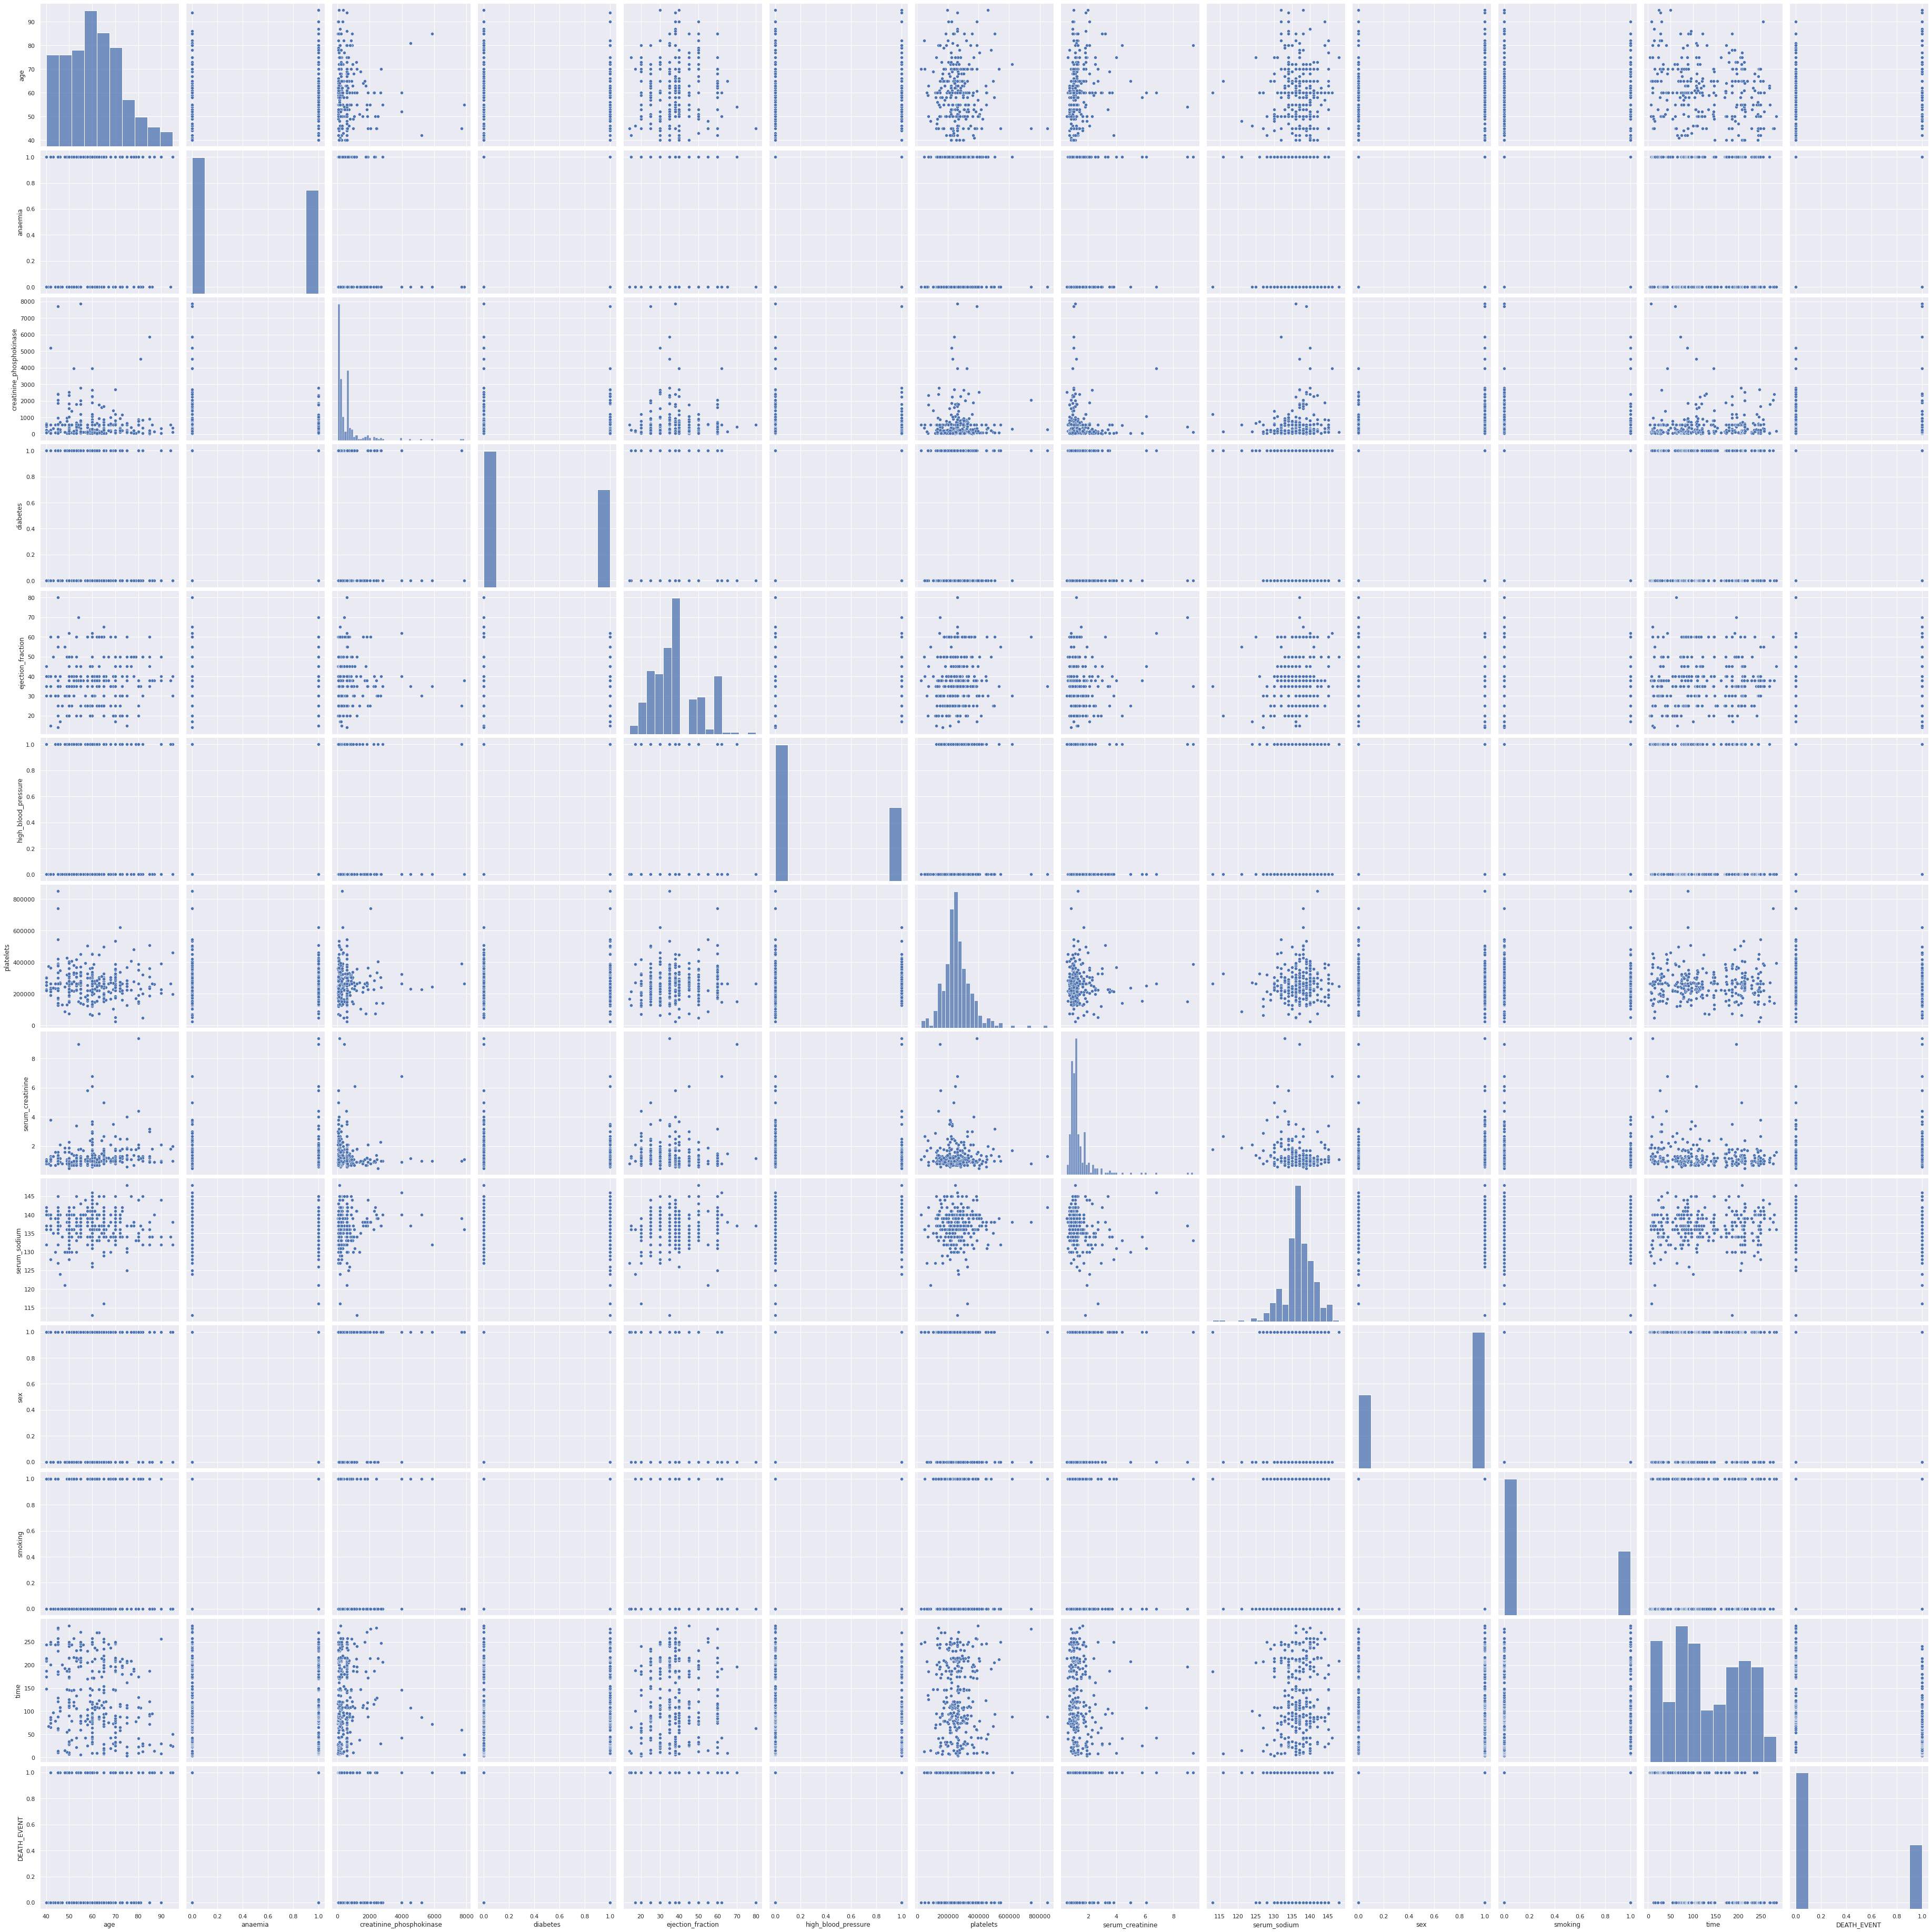

In [ ]:
sns.set()
cols = ['age', 'anaemia' ,'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
 'high_blood_pressure', 'platelets' ,'serum_creatinine' ,'serum_sodium' ,'sex',
 'smoking', 'time', 'DEATH_EVENT']
sns.pairplot(df_heart[cols], height = 4)
plt.show();

### Let's start by analyzing each feature separately
<br>

## **Age Distribution**

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df_heart['age'],
    xbins=dict(
        start=40,
        end=95,
        size=1
    ),
    marker_color='blue',
    opacity=1
))

fig.update_layout(
    title_text='Age Distribution',
    xaxis_title_text='Age',
    yaxis_title_text='COUNT', 
    bargap=0.05,

)

fig.show()

<br>
<br>

### Knowing who died considering the **Age** Feature
<br>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



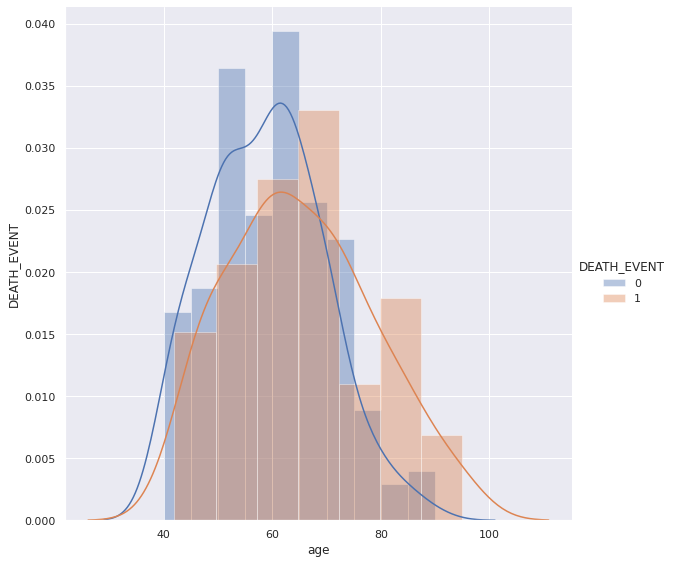

In [ ]:
sns.FacetGrid(df_heart,hue='DEATH_EVENT',height=8).map(sns.distplot,'age').set_axis_labels('age',
'DEATH_EVENT').add_legend()
plt.show()

In [ ]:
fig = px.box(
    df_heart, 
    x="DEATH_EVENT", 
    y="age", 
    points='all',
    title='Age & DEATH_EVENT box plot',
       
)

fig.show()

<br>
<br>

## **Anaemia Distribution**
<br>

In [ ]:
ds = df_heart['anaemia'].value_counts().reset_index()
ds.columns = ['anaemia', 'count']

fig = px.pie(
    ds, 
    values='count', 
    names="anaemia", 
    title='Anaemia bar chart', 
)

fig.show()


<br>
<br>

### Knowing who died considering Anaemia distribution

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



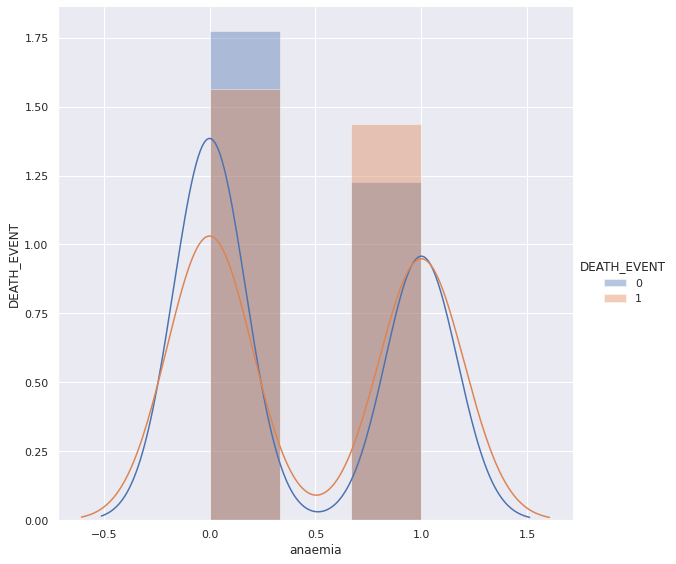

In [ ]:
sns.FacetGrid(df_heart,hue='DEATH_EVENT',height=8).map(sns.distplot,'anaemia').set_axis_labels('anaemia',
'DEATH_EVENT').add_legend()
plt.show()

In [ ]:
d1 = df_heart[(df_heart["DEATH_EVENT"]==0) & (df_heart["anaemia"]==0)]
d2 = df_heart[(df_heart["DEATH_EVENT"]==1) & (df_heart["anaemia"]==0)]
d3 = df_heart[(df_heart["DEATH_EVENT"]==0) & (df_heart["anaemia"]==1)]
d4 = df_heart[(df_heart["DEATH_EVENT"]==1) & (df_heart["anaemia"]==1)]

label1 = ["No Anaemia","Anaemia"]
label2 = ['No Anaemia - Survived','No Anaemia - Died', "Anaemia -  Survived", "Anaemia  - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="ANAEMIA"),1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="ANAEMIA VS DEATH_EVENT"),1, 2)

<br>
<br>
<br>
<br>

## **creatinine_phosphokinase Distribution (CPK)**


In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df_heart['creatinine_phosphokinase'],
    xbins=dict(
        start=23.000000	,
        end=7861.000000	,
        size=150
    ),
    marker_color='black',
    opacity=1
))

fig.update_layout(
    title_text='CPK Distribution',
    xaxis_title_text='CPK',
    yaxis_title_text='COUNT', 
    bargap=0.05,

)

fig.show()

<br>
<br>

### **Knowing who died condidering CSK**
<br>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



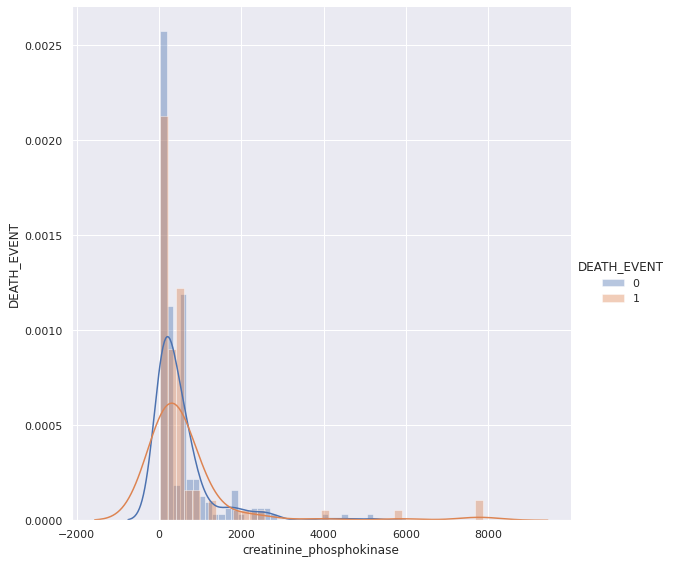

In [ ]:
sns.FacetGrid(df_heart,hue='DEATH_EVENT',height=8).map(sns.distplot,'creatinine_phosphokinase').set_axis_labels('creatinine_phosphokinase',
'DEATH_EVENT').add_legend()
plt.show()

<br>
<br>

## **Diabetes Distribution**
<br>

In [ ]:
ds = df_heart['diabetes'].value_counts().reset_index()
ds.columns = ['diabetes', 'count']

fig = px.pie(
    ds, 
    values='count', 
    names="diabetes", 
    title='Diabetes bar chart', 
)

fig.show()


<br><br>
### Knowing who died considering **Diabetes** feature

In [ ]:
d1 = df_heart[(df_heart["DEATH_EVENT"]==0) & (df_heart["diabetes"]==0)]
d2 = df_heart[(df_heart["DEATH_EVENT"]==0) & (df_heart["diabetes"]==1)]
d3 = df_heart[(df_heart["DEATH_EVENT"]==1) & (df_heart["diabetes"]==0)]
d4 = df_heart[(df_heart["DEATH_EVENT"]==1) & (df_heart["diabetes"]==1)]

label1 = ["No Diabetes","Diabetes"]
label2 = ['No Diabetes - Survived','Diabetes - Survived', "No Diabetes -  Died", "Diabetes  - Died"]
values1 = [(len(d1)+len(d3)), (len(d2)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="DIABETES"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="DIABETES VS DEATH_EVENT"),
              1, 2)

fig.show()

## **Ejection Fraction Distribution (EF)**
<br>

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df_heart['ejection_fraction'],
    xbins=dict(
        start=14.000000	,
        end=80.000000	,
        size=5
    ),
    marker_color='Blue',
    opacity=1
))

fig.update_layout(
    title_text='ejection_fraction Distribution',
    xaxis_title_text='ejection_fraction',
    yaxis_title_text='COUNT', 
    bargap=.05,

)

fig.show()


<br><br>
### Knowing who died considering **Ejection Fraction** feature

In [ ]:
# Now lets categorize the above histogram by DEATH_EVENT
fig = px.histogram(df_heart, x="ejection_fraction", color="DEATH_EVENT", marginal="violin", hover_data=df_heart.columns,
                   title ="Distribution of EJECTION FRACTION Vs DEATH_EVENT", 
                   labels={"ejection_fraction": "EJECTION FRACTION"},
                   template="plotly_white",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

<br><br><br><br>

## **High Blood Pressure Distribution**
<br>

In [ ]:
d1 = df_heart[(df_heart["DEATH_EVENT"]==0) & (df_heart["high_blood_pressure"]==0)]
d2 = df_heart[(df_heart["DEATH_EVENT"]==0) & (df_heart["high_blood_pressure"]==1)]
d3 = df_heart[(df_heart["DEATH_EVENT"]==1) & (df_heart["high_blood_pressure"]==0)]
d4 = df_heart[(df_heart["DEATH_EVENT"]==1) & (df_heart["high_blood_pressure"]==1)]

label1 = ["No high_blood_pressure","high_blood_pressure"]
label2 = ['No high_blood_pressure - Survived','high_blood_pressure - Survived', "No high_blood_pressure -  Died", "high_blood_pressure  - Died"]
values1 = [(len(d1)+len(d3)), (len(d2)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="high_blood_pressure"),1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="high_blood_pressure VS DEATH_EVENT"),1, 2)
fig.show()

<br><br><br><br>

## **Platelets Distribution**
<br>

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df_heart['platelets'],
    xbins=dict(
        start=25100.000000	,
        end=850000.000000	,
        size=10000
    ),
    marker_color='black',
    opacity=1
))

fig.update_layout(
    title_text='platelets Distribution',
    xaxis_title_text='platelets',
    yaxis_title_text='COUNT', 
    bargap=0.5,

)

fig.show()

<br><br>
### Knowing who died considering **Platelets** feature

In [ ]:
fig = px.histogram(df_heart, x="platelets", color="DEATH_EVENT", marginal="violin", hover_data=df_heart.columns)
fig.show()

<br><br><br><br>

## **Serum Creatinine Distribution**
<br>

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df_heart['serum_creatinine'],
    xbins=dict(
        start=0.50000	,
        end=9.40000	,
        size=0.1
    ),
    marker_color='black',
    opacity=1
))

fig.update_layout(
    title_text='serum_creatinine Distribution',
    xaxis_title_text='serum_creatinine',
    yaxis_title_text='COUNT', 
    bargap=0.2,

)

fig.show()

<br><br>
### Knowing who died considering **Serum Creatinine** feature

In [ ]:
fig = px.histogram(df_heart, x="serum_creatinine", color="DEATH_EVENT", marginal="violin", hover_data=df_heart.columns,
                   title ="Distribution of SERUM CREATININE by DEATH_EVENT", 
                   labels={"serum_creatinine": "SERUM CREATININE"},
                   template="plotly_white",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

<br><br><br><br>

## **Serum Sodium Distribution**
<br>

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df_heart['serum_sodium'],
    xbins=dict(
        start=113	,
        end=148	,
        size=1
    ),
    marker_color='black',
    opacity=1
))

fig.update_layout(
    title_text='serum_sodium Distribution',
    xaxis_title_text='serum_sodium',
    yaxis_title_text='COUNT', 
    bargap=0.01,

)

fig.show()

<br><br>
### Knowing who died considering **Serum Sodium** feature

In [ ]:
fig = px.histogram(df_heart, x="serum_sodium", color="DEATH_EVENT", marginal="violin", hover_data=df_heart.columns)
fig.show()

<br><br><br><br>

## **Sex Distribution**
<br>

In [ ]:
ds = df_heart['sex'].value_counts().reset_index()
ds.columns = ['sex', 'count']

fig = px.pie(
    ds, 
    values='count', 
    names="sex", 
    title='Sex Distribution bar chart', 
)

fig.show()

<br><br>
### Knowing who died considering **Sex** feature

In [ ]:
d1 = df_heart[(df_heart["DEATH_EVENT"]==0) & (df_heart["sex"]==1)]
d2 = df_heart[(df_heart["DEATH_EVENT"]==1) & (df_heart["sex"]==1)]
d3 = df_heart[(df_heart["DEATH_EVENT"]==0) & (df_heart["sex"]==0)]
d4 = df_heart[(df_heart["DEATH_EVENT"]==1) & (df_heart["sex"]==0)]

label1 = ["Male","Female"]
label2 = ['Male&Survived','Male&Died', "Female&Survived", "Female&Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="Sex"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="DEATH_EVENT By Sex"),
              1, 2)

fig.show()

<br><br>

## **Time Distribution**
<br>

In [ ]:
fig = px.histogram(df_heart, x="time", color="DEATH_EVENT", marginal="violin", hover_data=df_heart.columns)
fig.show()

<br><br>

## **Smoking Distribution**
<br>


In [ ]:
d1 = df_heart[(df_heart["DEATH_EVENT"]==0) & (df_heart["smoking"]==0)]
d2 = df_heart[(df_heart["DEATH_EVENT"]==1) & (df_heart["smoking"]==0)]
d3 = df_heart[(df_heart["DEATH_EVENT"]==0) & (df_heart["smoking"]==1)]
d4 = df_heart[(df_heart["DEATH_EVENT"]==1) & (df_heart["smoking"]==1)]

label1 = ["No Smoking","Smoking"]
label2 = ['No Smoking-Survived','No Smoking-Died', "Smoking-Survived", "Smoking-Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="SMOKING"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="SMOKING VS DEATH_EVENT"),
              1, 2)

<br><br>
## **Death Distribution Distribution**
<br>

In [ ]:
ds = df_heart['DEATH_EVENT'].value_counts().reset_index()
ds.columns = ['DEATH_EVENT', 'count']

fig = px.pie(
    ds, 
    values='count', 
    names="DEATH_EVENT", 
    title='DEATH_EVENT bar chart', 
)

fig.show()

<br><br>

#  **Data Preprocessing**
<br>

## Handling Missing Values


In [ ]:
df_heart.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### *While checking for null values, we came across zero null values,hence there is no need for using fillna() or interpolate() methods for handling null values or the missing values*


## **Explore Outliers**


<br><br> 
### **Visualize outliers for **Age****
<br>


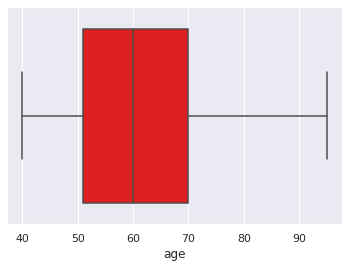

In [ ]:
sns.boxplot(x=df_heart['age'],color='red')
# There are no significant outliers for 'age' feature

<br><br> 
### **Visualize outliers for **Creatinine_phosphokinase****
<br>


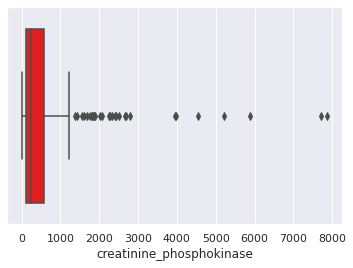

In [ ]:
sns.boxplot(x=df_heart['creatinine_phosphokinase'],color='red')

<br><br> 
### **Visualize outliers for **Ejection Fraction****
<br>

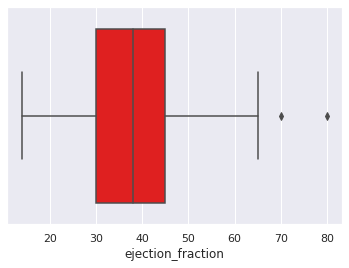

In [ ]:
sns.boxplot(x=df_heart['ejection_fraction'],color='red')

 
### *Since we found outliers, it is important to get rid of them for better accuracy of the model*
<br>

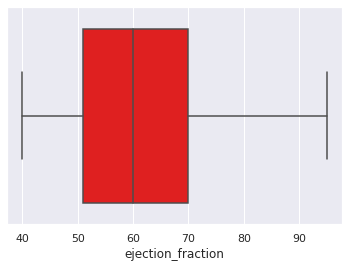

In [ ]:
df_heart['ejection_fraction']=df_heart[df_heart['ejection_fraction']<70]   #deleting all values for ejection fraction greater than 70
# We can visualize our ejection fraction again to verify if there are any outliers left
sns.boxplot(x=df_heart['ejection_fraction'],color='red')

<br><br>

## **Heat Map Correlation**
<br>

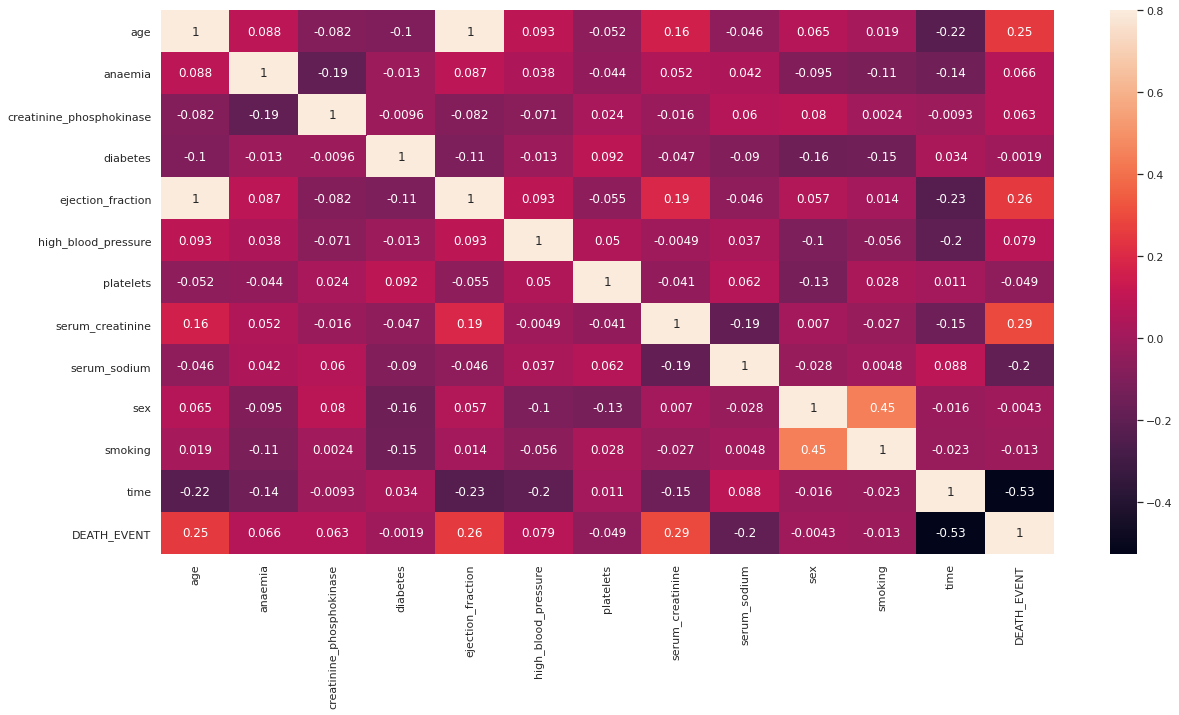

In [ ]:
corrmat=df_heart.corr()
f,ax=plt.subplots(figsize=(20,10))
sns.heatmap(corrmat,vmax=0.8,annot=True)

<br><br>
## **Data Modelling**
<br>

### **Separating the independent variables from the dependent variable *DEATH_EVENT* using the iloc() function**


In [ ]:
Features = ['time','ejection_fraction','serum_creatinine']
X = df_heart[Features]
y = np.array(df_heart["DEATH_EVENT"])
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0
 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


### **Splitting the data into training data and test data using sklearn.model_selection library's function train_test_split**


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_train)
#X_train[0]=X_train[0].fillna(X_train[0].median())
X_train.isnull().sum()
#X_test[0]=X_test[0].fillna(X_test[0].median())
X_test.isnull().sum()

time                 0
ejection_fraction    0
serum_creatinine     0
dtype: int64

<br><br>
 
## **Build a Model**
<br>

### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions=np.array(lr.predict(X_test))
print(predictions)
print(y)
predictions=predictions[0:90]
print(predictions.shape)
print(y_test.shape)

[0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0
 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0
 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0
 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0
 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

### **Predicting the accuracy of the model using accuracy_score function**

In [ ]:
from sklearn.metrics import accuracy_score
model_accuracy=accuracy_score(y_test,predictions)

In [ ]:
accuracy_list=[]
accuracy_list.append(100*model_accuracy)

In [ ]:
print( "Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* model_accuracy))

Accuracy of Logistic Regression is :  54.44%


#### The model accuracy is coming out to be aproximately 55% due to Logistic Regression.However, the model accuracy can be improved by advanced regression methods such as Random forest Classifier,Gradient Boosting Classifier or LGBM Classifier techniques.